## ボストンの住宅データセット (ボストン市の住宅価格)
* 設定
    * ボストンの住宅データセットを線形回帰モデルで分析する。
    * 適切な査定結果が必要。
        * 高すぎても安すぎても会社に損害がある。
* 課題
    * 部屋数が4で犯罪率が0.3の物件はいくらになるか？

In [65]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
boston = load_boston()

In [4]:
print(f'boston.data.shape: {boston.data.shape}')  # 説明変数 (住宅価格以外の変数)
print(f'boston.target.shape: {boston.target.shape}')  # 目的変数 (住宅価格)

boston.data.shape: (506, 13)
boston.target.shape: (506,)


In [5]:
print(type(boston.data))  # 型を確認する

<class 'numpy.ndarray'>


In [6]:
boston.data[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [7]:
boston.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [8]:
boston.feature_names  # カラム名

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [37]:
y_train = boston.target

In [9]:
# DataFrameに変換
df_train = pd.DataFrame(boston.data, columns=boston.feature_names)

In [10]:
df_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### 単回帰分析

In [38]:
X_train = df_train[['RM']].values  # RM: 部屋数

In [39]:
X_train[:5]

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147]])

In [18]:
model = LinearRegression()  # 回帰モデル

In [40]:
model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = model.predict([[4]])  # 部屋数4の住宅価格を予測する

In [42]:
y_pred  # 住宅価格の予測値

array([1.73781515])

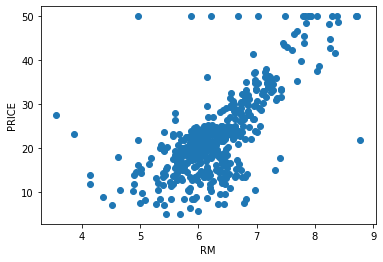

In [43]:
plt.scatter(X_train, y_train)
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.show()

### 重回帰分析(2変数)

In [44]:
X_train = df_train[['CRIM', 'RM']]

In [45]:
X_train.head()

,CRIM,RM
0,0.00632,6.575
1,0.02731,6.421
2,0.02729,7.185
3,0.03237,6.998
4,0.06905,7.147


In [36]:
model2 = LinearRegression()

In [46]:
model2.fit(X_train, y_train)

LinearRegression()

In [51]:
# 部屋数が4で犯罪係数が0.3の住宅価格を予測する
y_pred = model2.predict([[0.3, 4]])

In [52]:
y_pred  # 住宅価格の予測値を出力

array([4.24007956])

### 係数と切片の値を確認

In [57]:
# 単回帰の回帰係数と切片の値を出力する
print(f'回帰係数: {model.coef_}, 切片: {model.intercept_}')

回帰係数: [9.10210898], 切片: -34.670620776438554


In [58]:
# 重回帰の回帰係数と切片の値を出力する
print(f'回帰係数: {model2.coef_}, 切片: {model2.intercept_}')

回帰係数: [-0.26491325  8.39106825], 切片: -29.244719451930013


### モデルの検証

In [60]:
# 80%を学習用、20%を検証用データにするよう分割 (シード値はサンプルコードと同じにした)
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.2, random_state=666)

In [61]:
model = LinearRegression()  # 回帰モデル
model.fit(X_train, y_train)  # 回帰モデルを学習

LinearRegression()

In [62]:
# 作成したモデルから予測を行う
y_train_pred = model.predict(X_train)  # 学習用データ
y_test_pred = model.predict(X_test)  # テストデータ

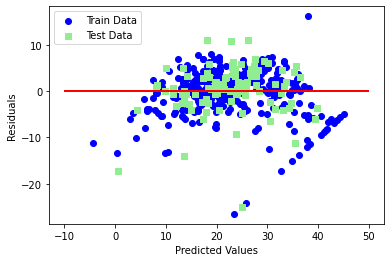

In [63]:
# 学習用、検証用それぞれで残差(Residuals)をプロット
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Train Data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
# y = 0に直線を引く
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.show()

In [67]:
# 平均二乗誤差(MSE)を出力する
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'【平均二乗誤差】 Train: {mse_train:.3f}, Test : {mse_test:.3f}')

【平均二乗誤差】 Train: 20.797, Test : 27.206


上記の学習用データとテストデータの平均二乗誤差を比較すると、 `mse_train < mse_test` となっている。<br/>
これは、学習用データにフィットしすぎており、 **過学習** であると言える。

In [68]:
# 決定係数(R^2 スコア)を出力
# scikit-learn の r2_score 関数でも同様にスコアを出力できる
r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)
print(f'【決定係数】 Train: {r2_train:.3f}, Test: {r2_test:.3f}')

【決定係数】 Train: 0.761, Test: 0.634


上記学習用データとテストデータの決定係数を比較すると、 `r2_train > r2_test` となっている。<br/>
これは、未知のデータへの当てはまりが良くないといえる。